In [65]:
import arviz as az
import numpy as np
import pymc as pm

In [104]:
data_categorical = np.ma.masked_equal(data_categorical, -1)
data_categorical

masked_array(data=[0, 0, 2, 2, 1, 1, 1, 2, 2, --, 1, 2, 0, 2, 0, 2, 1, --,
                   --, 1, 2, --, 2, 2, 1, 0, 0, 0, 0, --, 2, --, 0, --, 0,
                   2, 2, 2, 0, 1, --, 2, 0, --, 1, 2, 0, 1, 2, 2, --, 2,
                   2, 2, 1, 2, 1, 2, 1, 0, 2, 2, --, 2, 1, 2, --, --, 2,
                   2, --, 0, --, 1, 0, 1, 0, --, 1, 0, 2, 0, 1, 1, --, 1,
                   2, 2, --, 2, 2, 2, 0, 2, 1, 0, --, 0, 1, --],
             mask=[False, False, False, False, False, False, False, False,
                   False,  True, False, False, False, False, False, False,
                   False,  True,  True, False, False,  True, False, False,
                   False, False, False, False, False,  True, False,  True,
                   False,  True, False, False, False, False, False, False,
                    True, False, False,  True, False, False, False, False,
                   False, False,  True, False, False, False, False, False,
                   False, False, False, 

In [102]:
data_categorical = np.random.choice(a=[-1, 0, 1, 2], p =[0.2, 0.3, 0.2, 0.3], size=100)
#data_categorical[:3] = np.nan
predictor = np.random.choice([0, 1, 2, 3, 4], size=100)

In [105]:
COORDS = {'sample': np.arange(len(data_categorical)), 'predictor': np.arange(5), 'category': np.arange(3)}
with pm.Model(coords=COORDS) as m:
   p_bar = pm.Dirichlet('p_cat', a=np.ones((5,3))/5, dims=('predictor', 'category'))
   x = pm.Categorical('x', p=p_bar[predictor,:], observed=data_categorical)   

/Users/JO/miniforge3/envs/epidemiology-pyenv/lib/python3.11/site-packages/pymc/model/core.py:1317: ImputationWarning: Data in x contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


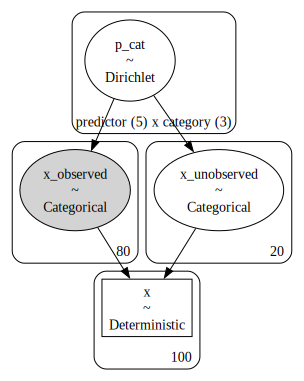

In [106]:
m.to_graphviz()

In [107]:
with m:
    idata = pm.sample()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p_cat]
>CategoricalGibbsMetropolis: [x_unobserved]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [108]:
az.summary(idata).head(20)

/Users/JO/miniforge3/envs/epidemiology-pyenv/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/JO/miniforge3/envs/epidemiology-pyenv/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/JO/miniforge3/envs/epidemiology-pyenv/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/JO/miniforge3/envs/epidemiology-pyenv/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"p_cat[0, 0]",0.315,0.105,0.119,0.505,0.002,0.001,3310.0,2885.0,1.0
"p_cat[0, 1]",0.265,0.098,0.089,0.450,0.002,0.001,3255.0,3359.0,1.0
"p_cat[0, 2]",0.420,0.109,0.212,0.612,0.002,0.001,3739.0,3125.0,1.0
"p_cat[1, 0]",0.176,0.104,0.014,0.366,0.002,0.001,3098.0,2655.0,1.0
"p_cat[1, 1]",0.334,0.127,0.108,0.566,0.002,0.001,3607.0,3135.0,1.0
"p_cat[1, 2]",0.490,0.132,0.239,0.722,0.002,0.001,4609.0,3284.0,1.0
"p_cat[2, 0]",0.118,0.073,0.007,0.250,0.001,0.001,2525.0,2216.0,1.0
"p_cat[2, 1]",0.281,0.100,0.103,0.465,0.002,0.001,2451.0,2967.0,1.0
"p_cat[2, 2]",0.601,0.110,0.394,0.800,0.002,0.002,2200.0,2745.0,1.0
"p_cat[3, 0]",0.460,0.131,0.222,0.706,0.002,0.002,3450.0,3095.0,1.0
